In [1]:
cd /content/drive/MyDrive/GoingDeeper(NLP)

/content/drive/MyDrive/GoingDeeper(NLP)


In [2]:
pwd

'/content/drive/MyDrive/GoingDeeper(NLP)'

In [3]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 44.6 MB/s 


In [4]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash


--2022-03-25 00:14:50--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-03-25 00:14:50--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3bbac84611e9f9d85637e75641.dl.dropboxusercontent.com/cd/0/get/BiGuDH_McU278ztvLlDan2D3Pu0386CFMAaB96UJRyPJ9Ktgz8Z-XXg8uD9Mc_bRfZuw2mvp-qYKDRoal_jICsCUkOFlLC2sA-WUwlf4112vas-r133D6ZkacKyJo7bn538Vgwti6oarliLwPEKN_BqsLWTnPMjaJhmsRG_WxA4WRuz97zlqOKcP9AKg4-fTxNE/file?dl=1# [following]
--2022-03-25 00:14:50--  https://uc3bbac84611e9f9d85637e75641.dl.dropboxusercontent.com/cd/0/get/

In [5]:
mkdir -p /content/drive/MyDrive/GoingDeeper\(NLP\)/sp_tokenizer/data

In [6]:
cd /content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data

/content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data


In [7]:
# ! wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

In [8]:
# ! tar -xzvf korean-english-park.train.tar.gz

In [9]:
! ls

korean-english-park.train.en	   ratings_test.txt
korean-english-park.train.ko	   ratings_train.txt
korean-english-park.train.ko.temp


In [10]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 0. 여기까지 환경설정 끝!

이제 사용된 

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

%matplotlib inline

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.8.0
1.21.5
3.2.2
0.6.0


# Step 1. SentencePiece 설치하기

In [12]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.0 MB/s 


# Step 2. SentencePiece 모델 학습

네이버 영화 리뷰 데이터를 이용하여 filtered_corpus를 먼저 제작하였습니다.

In [13]:
import sentencepiece as spm
import os
import pandas as pd

data_file = '/content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data/ratings_train.txt'

raw_data = pd.read_table(data_file)
raw_data.head(30)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


# 데이터 전처리를 먼저 해주었습니다.

1. 한글 맞춤법 검사기 사용 
2. 중복된 데이터 제거, 너무 긴 혹은 짧은 데이터 삭제를 통한 데이터 정제

### 1. 한글 맞춤법 검사기 사용

In [14]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-kkvy9t_w
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-kkvy9t_w
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=c96a1a6944ce94f0536ee17a311a408ba3bbf5f99725a1c456b3d2c7342a4004
  Stored in directory: /tmp/pip-ephem-wheel-cache-amjs0c57/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [15]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


위 블록이 제대로 동작하는 것을 확인하고 raw_data 전체를 한글 맞춤법을 수정해주었습니다.

> Not well-formed (invalid token): line 1, column 96 에러가 발생하였으나, 해결하지 못해서 try-except로 구문을 감싸고 예외 처리발생시 그냥 그 문장을 무시하도록 진행하였습니다.

In [16]:
corrected_data = raw_data['document']

In [17]:
try:
  for idx in range(len(corrected_data)):
    spelled_sent = spell_checker.check(corrected_data[idx])
    hanspell_sent = spelled_sent.checked  

    corrected_data.iloc[idx] = hanspell_sent
    
    # 제대로 되고있는지 확인하기 위하여 중간중간 뽑아봄.
    if idx % 100 == 0:
      print(idx, hanspell_sent)
except Exception:
  pass      

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0 아 더빙.. 진짜 짜증 나네요 목소리
100 신카이 마코토의 작화와, 미유와 하나하나가 연기를 잘해줘서 더대 박이었다.
200 TV용 건담 시리즈 중에서 아직까지도 최고봉
300 일본 영화 수입 금지 시절에도 비디오테이프로 돌려봤던 불후의 명작 아 그립다
400 좀 검증된 애들 좀 출현시켜라 이탈리아 특집 장난하냐
500 나 이거 보고 인형 절대 안 삽
600 수많은 최루성 멜로는 여기에서...
700 음악영화라 나에겐 취향 저격이지만... 비긴 어게인처럼 대중적으로 흥행하긴 힘들 영화네요.. 하지만 여주가 너무 매력적이에요 ㅎㅎ
800 제발 전문 성우를 써주세요 ㅠㅠ
900 유튜브 동영상을 돈 내고 보는 게 낫다는 생각이 들게 한 영화
1000 정말 최고의 명작 성인이 되고 본 이집트의 왕자는 또 다른 감동 그 자체네요
1100 반지의 제왕
1200 특수효과 없이도 관객을 납득시키던 능력.
1300 3분 2가 화면이 검하고 결말도 백이고 뭔 소리인 모르겠고 ㅡㅡ
1400 노 답이다 진짜....
1500 스파이더맨을 가장 좋아하는 1人~ 스파이더맨 정말 사랑합니다. 영원했으면 좋겠네요!!
1600 괜히 봤다
1700 10년 전에 봤던 영화인데도 귀 자르는 장면은 기억에 남아있는 영화
1800 정말 괜찮은 영화. 행복이 묻어나는 ^^
1900 처음엔 정신이 피폐해진 것 같아 불쾌했다. 막연히 걱정하지만 넘겨버릴법한 범죄 상황을 실감 나고 섬세하게 묘사한 감독이 대단하다... 박진감은 넘치지만 억지 상황이 난무해 문단속의 중요성을 잊게 한 불사 여인의 비현실 영화 '숨바꼭질'이 문득 생각난다.
2000 최최최최악악악악 !!!!
2100 한번 보면 빠져들어버리는... 재미있는 사신 드라마.
2200 정윤희 씨 정말 아름답다는 말이 모자라네요.. 살아있는 인형이다..
2300 짠하네요
2400 정준용 씨 연기 너무 멋져요!!!
2500 몰입도 쩔어요 정재영 씨를 드라마에서 볼 수 있어서 좋아요
2600 주윤발이 이런 흐접 영화에 출연했던 게 당시에 참 안타깝더라는

In [18]:
raw_data['document'] = corrected_data
del corrected_data

### 2. 중복된 데이터 제거, 너무 긴 혹은 짧은 데이터 삭제를 통한 데이터 정제

In [19]:
#리뷰 전체길이 확인
train_length = raw_data['document'].astype(str).apply(len)
train_length.head()

0    20
1    40
2    17
3    31
4    66
Name: document, dtype: int64

In [20]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 171
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.57
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 43.0


### nan값 제거 및 중복 값 제거

In [21]:
raw_data = raw_data.dropna()

In [22]:
raw_data = raw_data.drop_duplicates('document')

### 문장 길이 분포 확인하기

문장의 최단 길이: 1
문장의 최장 길이: 171
문장의 평균 길이: 36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


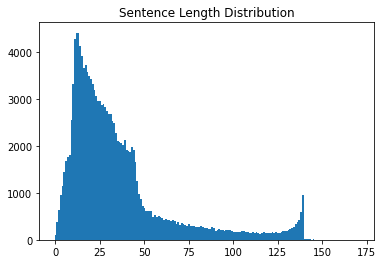

In [23]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw_data['document']:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len( raw_data['document']))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in  raw_data['document']:
  sentence_length[len(sen)-1] += 1

plt.pyplot.bar(range(max_len), sentence_length, width=1.0)
plt.pyplot.title("Sentence Length Distribution")
plt.pyplot.show()

### 기존의 check_sentence_with_length는 길이가 1인 corpus만 출력해주기 때문에 raw_data를 입력으로 정답라벨과 corpus를 같이 뽑아주도록 수정했습니다.

In [33]:
def check_sentence_with_length(raw_data, length):
    count = 0
    
    for column, item in raw_data.iteritems():
        if len(item['document']) == length:
            print(item['label'],item['document'])
            count += 1
            if count > 100: return

check_sentence_with_length(raw_data, 1)

KeyError: ignored

In [25]:
check_sentence_with_length(raw_data, 2)

최고
졸작
대박
버려
망함
굳굳
안습
망작
굿!
별로
신나
쓰래
볼만
허접
비추
좋다
ㅎㅎ
아나
ㅉㅉ
야.
역시
^^
오오
평이
지루
오욈
ㅋㅋ
지송
눈물
당연
쩔어
별노
몰입
졸잼
쵝오
돋네
오글
이응
첨봄
최악
잼씀
ok
유후
별루
감동
gg
;;
조앙
1점
표절
명작
으휴
에효
ㄱ굿
굿잡
잼나
10
ㅜㅜ
우왕
거지
굿굿
좋음
실망
굿.
ㅇㅇ
애이
짱임
전설
mm
와우
등록
하위
그닥
뭉클
삼류
HN
윤하
섹시
실화
머냐
수작
꿀잼
동감
dd
굳ㅋ
굳!
추천
좋아
55
안봐
개쩜
올레
난해
ㅠㅠ
뭐니
ㅁㅁ
뭥미
쓰랙
좇~
오우
미안


### 길이 1인 데이터는 의미없는 데이터 비율이 높아서 삭제하기로 하였습니다.

In [28]:
# drop_idx = raw_data[len(raw_data['document'])>1]

In [29]:
raw_data = raw_data[raw_data['document'].map(len) > 1]

# 회고

1.다음과 같이 raw_data의 길이를 뽑는데 TypeError가 났다. 이 경우는 Nan값이 존재하는 경우 길이를 구할 수 없어서 나는 오류이다.

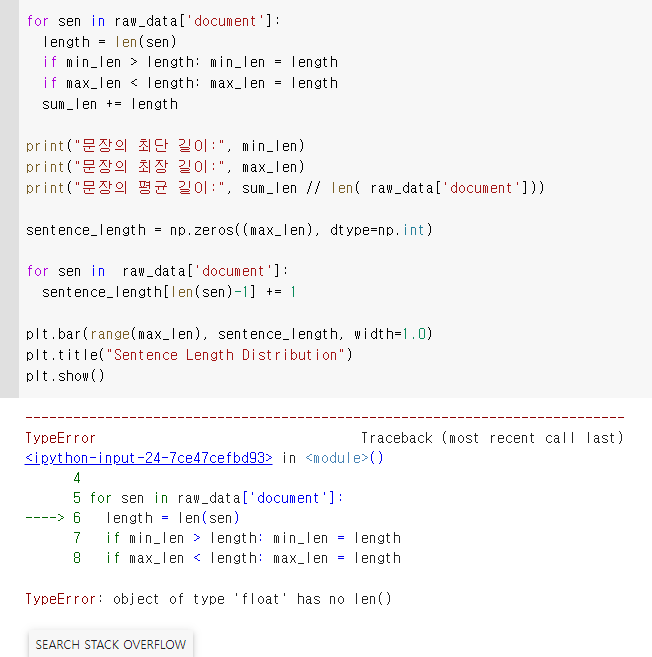

2. 판다스에서 특정 조건을 삭제하는 메소드가 자주 쓰인다. 이에 대해서 정리해보았다.

- 방법 1.

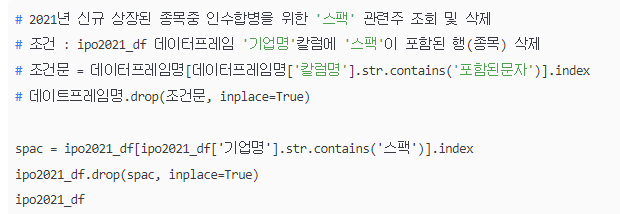


- 방법 2. DF = DF[DF.메뉴 != '돈까스']

3. 방법 1을 pandas 데이터 프레임을 이용해서 사용하면 keyError가 일어납니다. len(string)을 포함하는 조건식을 기반으로 pandas dataframe 행을 삭제하는 방법

- [출처](http://daplus.net/python-keyerror%EB%A5%BC%EC%A3%BC%EB%8A%94-len-string%EC%9D%84-%ED%8F%AC%ED%95%A8%ED%95%98%EB%8A%94-%EC%A1%B0%EA%B1%B4%EC%8B%9D%EC%9D%84-%EA%B8%B0%EB%B0%98%EC%9C%BC%EB%A1%9C-%ED%8C%AC%EB%8D%94-dat/)

> 오류 코드 : df[(len(df['column name']) < 2)]

> 해결 코드 : df[df['column name'].map(len) < 2]

4. 데이터의 양이 많아 모든 데이터에 hanspell 처리를 해주려면 정말 오래걸렸습니다. 데이터프레임을 병렬처리해주는 방법을 연구하고싶습니다.



 5. 저번부터 계속 헷갈렸던 건데, 판다스 dataframe을 for문으로 돌리려면 (컬럼 정보를 주고 값을 뽑아 낼 수 있는 for 문)으로 돌리려면 `for df in dataframe:`형식으로 뽑으면 안된다


 - [참고한 사이트](https://www.delftstack.com/ko/howto/python-pandas/how-to-iterate-through-rows-of-a-dataframe-in-pandas/)
1. Pandas DataFrame에서 행을 반복하는index 속성
2. 파이썬에서 DataFrame의 행을 반복하는loc[]메소드
3. 파이썬에서 DataFrame의 행을 반복하는iloc[]메소드
4. pandas.DataFrame.iterrows()는 행 Pandas를 반복합니다
5. pandas.DataFrame.itertuples는 행 Pandas를 반복합니다
6. pandas.DataFrame.apply는 행 Pandas를 반복합니다

메소드가 다양하므로 각각을 어떤 상황에서 써야하는지를 꼭 알아두자!
 
 